In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns
import math
from scipy.spatial.distance import euclidean, chebyshev, cityblock
import statistics

In [2]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [4]:
import unidecode
from unidecode import unidecode
import requests

In [5]:
import pandas as pd
import datetime
%matplotlib inline
from dateutil.parser import parse

In [6]:
# from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

In [7]:
driver = webdriver.Chrome()

In [8]:
driver.get('https://www.google.com/flights/explore/')

In [9]:
def scrape_data(start_date, from_place, to_place, city_name):
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    to_action = ActionChains(driver)
    to_action.send_keys(to_place)
    to_action.send_keys(Keys.ENTER)
    to_action.perform()
    
    from_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    from_input.click()
    from_action = ActionChains(driver)
    from_action.send_keys(from_place)
    from_action.send_keys(Keys.ENTER)
    from_action.perform() 
    
    time.sleep(5)
    current_url = driver.current_url
    split_url = current_url.split('2017')
    new_url = split_url[0] + start_date
    driver.get(new_url)    
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    

    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
    
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
    
    time.sleep(2)
    
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')

    time.sleep(1)

    data = []

    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))

    time.sleep(2)

    d = data[0]
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,4,4,0,0)).days)
                      for d in data]

    time.sleep(3)

    df = pd.DataFrame(clean_data, columns=['Price','Start_Date'])
    return df


In [10]:
df = scrape_data('2017-04-16','London','India','New Delhi')

In [ ]:
# df

In [ ]:
# df["Price"][9]= 420
# df[]

In [ ]:
df

In [ ]:
#Task2

In [ ]:
def scrape_data_90(start_date, from_place, to_place, city_name):
    
    to_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[4]/div/div')
    to_input.click()
    to_action = ActionChains(driver)
    to_action.send_keys(to_place)
    to_action.send_keys(Keys.ENTER)
    to_action.perform()
    
    from_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[3]/div/div[2]/div/div')
    from_input.click()
    from_action = ActionChains(driver)
    from_action.send_keys(from_place)
    from_action.send_keys(Keys.ENTER)
    from_action.perform() 
    
    time.sleep(5)
    current_url = driver.current_url
    split_url = current_url.split('2017')
    new_url = split_url[0] + start_date
    driver.get(new_url)    
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    

    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
    
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
    
    time.sleep(2)
    
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')

    time.sleep(1)
    data_90 = []

    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        data_90.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
    
    move_bars_input = driver.find_element_by_xpath('//*[@id="root"]/div[3]/div[4]/div/div[2]/div[1]/div/div[2]/div[2]/div/div[2]/div[5]')
    move_bars_input.click()
    move_bars_input = ActionChains(driver)
    move_bars_input.perform()
    
    time.sleep(5)
    results = driver.find_elements_by_class_name('LJTSM3-v-c')
    result_names = []
    for i in range(len(results)):
        result_names.append(results[i].text)

    cities = []
    for city in result_names:
        name = city.split(',')
        cities.append(unidecode(name[0]))
        
    lower_case = [x.lower() for x in cities]
    if city_name.lower() in lower_case:
        city_index = lower_case.index(city_name.lower())
        
    time.sleep(2)
        
    box_class = driver.find_elements_by_class_name("LJTSM3-v-m")
    test = box_class[city_index]
    bars = test.find_elements_by_class_name('LJTSM3-w-x')
    
    next_data= []
    for bar in bars:
        ActionChains(driver).move_to_element(bar).perform()
        time.sleep(0.00001)
        next_data.append((test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[0].text,
           test.find_element_by_class_name('LJTSM3-w-k').find_elements_by_tag_name('div')[1].text))
    
    time.sleep(3)
    for element in next_data:
        if element not in data_90:
            data_90.append(element)
            
    d = data_90[0]
    clean_data = [(float(d[0].replace('$', '').replace(',', '')), (parse(d[1].split('-')[0].strip()) - datetime.datetime(2017,4,4,0,0)).days)
                      for d in data_90]
    
    df_90 = pd.DataFrame(clean_data, columns=['Price','Start_Date'])
    return df_90   
    

In [11]:
# df = scrape_data_90('2017-04-20','London','Europe','Dublin')

NameError: name 'scrape_data_90' is not defined

In [ ]:
# df = scrape_data_90('2017-04-16','London','California','San Jose')

In [12]:
df

,Price,Start_Date
0,601.0,12
1,576.0,13
2,967.0,14
3,752.0,15
4,691.0,16
5,716.0,17
6,716.0,18
7,670.0,19
8,670.0,20
9,691.0,21


In [ ]:
#Task 3 - IQR

In [ ]:
def task_3_IQR_(flight_data):
    px = [x for x in df['Price']]
    ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()
#     fl_data = clean_data(flight_data)
    ds = ff.sort_values(by='Price_of_flight')

    ds['Price_of_flight'].plot.box()
    plt.savefig('task_3_IQR.png')

    Q1 = ds['Price_of_flight'].quantile(0.25)
    Q3 = ds['Price_of_flight'].quantile(0.75)
    IQR = Q3 - Q1

    outl_index = []
    outl_data = []

    for i, x in enumerate(ff['Price_of_flight']):
        if (x < abs(Q1 - (1.5 * IQR))) or (x > abs(Q3 + (1.5 * IQR))):
            outl_index.append(i)

    for x in outl_index:
        outl_data.append([ds['Date_of_Flight'][x], ds['Price_of_flight'][x]])

    return pd.DataFrame(outl_data, columns=['Date_of_Flight', 'Price_of_flight'])

In [ ]:
def task_3_IQR(flight_data):    
#     df['Price'].plot.box()
#     plt.savefig('task_3_IQR.png')
    
    Q1 = df['Price'].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    
    i = 'Price'
    ax = df[i].plot(kind='kde')
 
    plt.subplot(212)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    sns.boxplot(x=df[i])
    plt.axvline(x=min)
    plt.axvline(x=max)
    plt.savefig('task_3_IQR.png')

    iqr_outlier_index = []
    iqr_outlier_data = []

    for i, x in enumerate(df['Price']):
        if (x < abs(Q1 - (1.5 * IQR))) or (x > abs(Q3 + (1.5 * IQR))):
            iqr_outlier_index.append(i)

    for x in iqr_outlier_index:
        iqr_outlier_data.append([df['Start_Date'][x], df['Price'][x]])

    return pd.DataFrame(iqr_outlier_data, columns=['Start_Date', 'Price'])
    
#     def outliers_iqr(ys):
#         quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#         iqr = quartile_3 - quartile_1
#         lower_bound = quartile_1 - (iqr * 1.5)
#         upper_bound = quartile_3 + (iqr * 1.5)
#         return np.where((ys > upper_bound) | (ys < lower_bound))
    
#     q1 = df['Price'].quantile(.25)
#     q2 = df['Price'].quantile(.75)
#     mask = df['Price'].between(q1, q2, inclusive=True)
#     iqr = df.loc[mask, 'Price']
    
#     i = 'Price'
#     ax = df[i].plot(kind='kde')
 
#     plt.subplot(212)
#     plt.xlim(df[i].min(), df[i].max()*1.1)
#     sns.boxplot(x=df[i])
#     plt.axvline(x=min)
#     plt.axvline(x=max)
    
#     outl_index = []
#     outl_data = []
    
#     lower_bound = q1 - (iqr * 1.5)
#     upper_bound = q2 + (iqr * 1.5)
    
#     for i, x in enumerate(df['Price']):
#         if (x < lower_bound) or (x > upper_bound):
#             outl_index.append(i)

#     for x in outl_index:
#         outl_data.append([df['Date_of_Flight'][x], df['Price'][x]])

#     return pd.DataFrame(outl_data, columns=['Date_of_Flight', 'Price'])
   

In [ ]:
task_3_IQR(df)

In [ ]:
# task4

In [81]:
def task_4(flight_data):
    px = [x for x in df['Price']]
    ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()

    X = MinMaxScaler().fit_transform(ff) 
    db = DBSCAN(eps = 0.06, min_samples = 5).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    plt.subplots(figsize = (12,8))

    for k,c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01) 

    def calculate_cluster_means(X, labels):
        lbls = np.unique(labels)
        print "Cluster labels: {}".format(np.unique(lbls))

        cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
        print "Cluster Means: {}".format(cluster_means)
        return cluster_means

    cluster_means = calculate_cluster_means(X, labels)

    out_ind = []
    for ind,y in enumerate(X):
        if labels[ind]== -1:
            out_ind.append([ind,y])

    class_member_mask = (labels == -1) 
    outs = X[class_member_mask]

    chosen_list = []

    for out_index,out in enumerate(outs):    
        min_list = []
        for index,cm in enumerate(cluster_means):         
             min_list.append(euclidean(cm, out))

        for inx,abc in enumerate(min_list):
            if abc == sorted(min_list)[0]:
                chosen_list.append([out_index,inx])
            
    outlier_prices = []
    for i,abc in enumerate(out_ind):
         outlier_prices.append(df['Price'][abc[0]])
    
    def cluster_mean_price(index):
        clus_ind = []
        for ind,y in enumerate(X):
            if labels[ind]== index:
                clus_ind.append([ind,y])
    
        class_member_mask_clus = (labels == index) 
        clus = X[class_member_mask_clus] 
   
        clus_prices=[]
        for i,abc in enumerate(clus_ind):
            clus_prices.append(df['Price'][abc[0]])   

        return clus_prices

    clus_chosenlist = []
    for b in chosen_list:
        clus_chosenlist.append(b[1])
    
# print clus_chosenlist

    clean_clus = []
    for i in clus_chosenlist:
        if i not in clean_clus:
            clean_clus.append(i)
        
# print clean_clus

# cluster_price_list = []
    cluster__price = []
    for value in clean_clus:
        for index in [value]:
            cluster__price.append(cluster_mean_price(index))
#     cluster_price_list.append(cluster__price)
#     cluster__price = []
    
# cluster__price

    v = []
    for i in cluster__price:
        v.append([abs(i[a+1]-i[a]) for a in range(len(i)-1)])
    
    for i in cluster__price:
    if all(a<=20 for a in i) == True:

# for i in v:
#     if all(a<=20 for a in i) == True: 
        
# cluster_price_list


# one = cluster_mean_price(clean_clus[0])

# # v = [abs(one[i+1]-one[i]) for i in range(len(one)-1)]

# df_best_price = pd.DataFrame(columns=('Start_Date','Price'))
# best_price = 0
# for i in cluster__price:
#     if all(a<=20 for a in i) == True:
#         best_price += 1
# #         df_best_price.loc[best_price] = df.loc[cluster__price[0]]

# # df_best_price
# best_price
        
        

0

In [ ]:
# df['Price'][5]

In [ ]:
df['Price'].plot.box()

In [ ]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [ ]:
outliers_iqr(df['Price'])

In [ ]:
q75, q25 = np.percentile(df.Price, [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

In [ ]:
# Q1 = df['Price'].quantile(0.25)
# Q3 = df['Price'].quantile(0.75)
# IQR = Q3 - Q1

# # #Values between Q1-1.5IQR and Q3+1.5IQR
# # filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

# # print(filtered.head())
# # #     nb

In [ ]:
q1 = df['Price'].quantile(.25)
q2 = df['Price'].quantile(.75)
mask = df['Price'].between(q1, q2, inclusive=True)
iqr = df.loc[mask, 'Price']
iqr

In [ ]:
i = 'Price'
 
# plt.figure(figsize=(10,8))
# plt.subplot(211)
# plt.xlim(df[i].min(), df[i].max()*1.1)
# plt.axvline(x=min)
# plt.axvline(x=max)
 
ax = df[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(df['Price'])), df['Price'])

In [ ]:
px = [x for x in df['Price']]
ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()

In [ ]:
# X = StandardScaler().fit_transform(ff) 
# db = DBSCAN(eps = 0.01, min_samples = 1).fit(X)

# labels = db.labels_
# clusters = len(set(labels))
# unique_labels = set(labels)
# colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# plt.subplots(figsize = (12,8))

# for k,c in zip(unique_labels, colors):
#     class_member_mask = (labels == k)
#     xy = X[class_member_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    
# plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01)   

In [62]:
def task_3_dbscan(flight_data):
       
    px = [x for x in df['Price']]
    ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()

    X = MinMaxScaler().fit_transform(ff) 
    db = DBSCAN(eps = 0.05, min_samples = 3).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    plt.subplots(figsize = (12,8))

    for k,c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01) 

    def calculate_cluster_means(X, labels):
        lbls = np.unique(labels)
        print "Cluster labels: {}".format(np.unique(lbls))

        cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
        print "Cluster Means: {}".format(cluster_means)
        return cluster_means

    cluster_means = calculate_cluster_means(X, labels)

    out_ind = []
    for ind,y in enumerate(X):
        if labels[ind]== -1:
            out_ind.append([ind,y])

    class_member_mask = (labels == -1) 
    outs = X[class_member_mask]

    chosen_list = []

    for out_index,out in enumerate(outs):    
        min_list = []
        for index,cm in enumerate(cluster_means):         
            min_list.append(euclidean(cm, out))

        for inx,abc in enumerate(min_list):
            if abc == sorted(min_list)[0]:
                chosen_list.append([out_index,inx])
            
    outlier_prices = []
    for i,abc in enumerate(out_ind):
        outlier_prices.append(df['Price'][abc[0]])
    
    def cluster_mean_price(index):
        clus_ind = []
        for ind,y in enumerate(X):
            if labels[ind]== index:
                clus_ind.append([ind,y])
    
        class_member_mask_clus = (labels == index) 
        clus = X[class_member_mask_clus] 
    
        clus_prices=[]
        for i,abc in enumerate(clus_ind):
            clus_prices.append(df['Price'][abc[0]])   

        return clus_prices
    
    
    mean_of_chosenlist_clusters= []
    for b in chosen_list:
        mean_of_chosenlist_clusters.append(mean(cluster_mean_price(b[1])))
    
    stdev_of_chosenlist=[]
    for b in chosen_list:
        stdev_of_chosenlist.append(stdev(cluster_mean_price(b[1])))
    
    outlier_indexes = []
    for b in chosen_list:
        outlier_indexes.append(b[0])

    
    df_best_price = pd.DataFrame(columns=('Start_Date','Price'))
    best_price = 0
    for x in range(0, (len(outlier_indexes))-1):    
        m = int(mean_of_chosenlist_clusters[x])
        s = int(stdev_of_chosenlist[x])
        if (outlier_prices[x] <  (m - (2 * s))) and  (outlier_prices[x] < (m - 50)):
            best_price += 1
            df_best_price.loc[best_price] = df.loc[outlier_indexes[x]]
        
    return df_best_price




In [ ]:
task_3_dbscan(df)

In [ ]:
def task_4_dbscan(flight_data):
       
    px = [x for x in df['Price']]
    ff = pd.DataFrame(px, columns=['Price_of_flight']).reset_index()

    X = MinMaxScaler().fit_transform(ff) 
    db = DBSCAN(eps = 0.05, min_samples = 3).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    plt.subplots(figsize = (12,8))

    for k,c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01) 

    def calculate_cluster_means(X, labels):
        lbls = np.unique(labels)
        print "Cluster labels: {}".format(np.unique(lbls))

        cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
        print "Cluster Means: {}".format(cluster_means)
        return cluster_means

    cluster_means = calculate_cluster_means(X, labels)

    out_ind = []
    for ind,y in enumerate(X):
        if labels[ind]== -1:
            out_ind.append([ind,y])

    class_member_mask = (labels == -1) 
    outs = X[class_member_mask]

    chosen_list = []

    for out_index,out in enumerate(outs):    
        min_list = []
        for index,cm in enumerate(cluster_means):         
            min_list.append(euclidean(cm, out))

        for inx,abc in enumerate(min_list):
            if abc == sorted(min_list)[0]:
                chosen_list.append([out_index,inx])
            
    outlier_prices = []
    for i,abc in enumerate(out_ind):
        outlier_prices.append(df['Price'][abc[0]])
    
    def cluster_mean_price(index):
        clus_ind = []
        for ind,y in enumerate(X):
            if labels[ind]== index:
                clus_ind.append([ind,y])
    
        class_member_mask_clus = (labels == index) 
        clus = X[class_member_mask_clus] 
    
        clus_prices=[]
        for i,abc in enumerate(clus_ind):
            clus_prices.append(df['Price'][abc[0]])   

        return clus_prices
    
    
    mean_of_chosenlist_clusters= []
    for b in chosen_list:
        mean_of_chosenlist_clusters.append(mean(cluster_mean_price(b[1])))
    
    stdev_of_chosenlist=[]
    for b in chosen_list:
        stdev_of_chosenlist.append(stdev(cluster_mean_price(b[1])))
    
    outlier_indexes = []
    for b in chosen_list:
        outlier_indexes.append(b[0])

Cluster labels: [-1  0  1  2  3  4  5  6]
Cluster Means: [array([ 0.25423729,  0.13125   ]), array([ 0.31355932,  0.1546875 ]), array([ 0.44067797,  0.13125   ]), array([ 0.51694915,  0.13125   ]), array([ 0.61016949,  0.078125  ]), array([ 0.81355932,  0.078125  ]), array([ 0.93220339,  0.078125  ])]
[[0, 0], [1, 0], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 0], [12, 0], [13, 0], [14, 1], [15, 1], [16, 2], [17, 2], [18, 2], [19, 4], [20, 4], [21, 4], [22, 5], [23, 5], [24, 5], [25, 5], [26, 5], [27, 5], [28, 6], [29, 6], [30, 6], [31, 6], [32, 6]]


NameError: name 'mean' is not defined

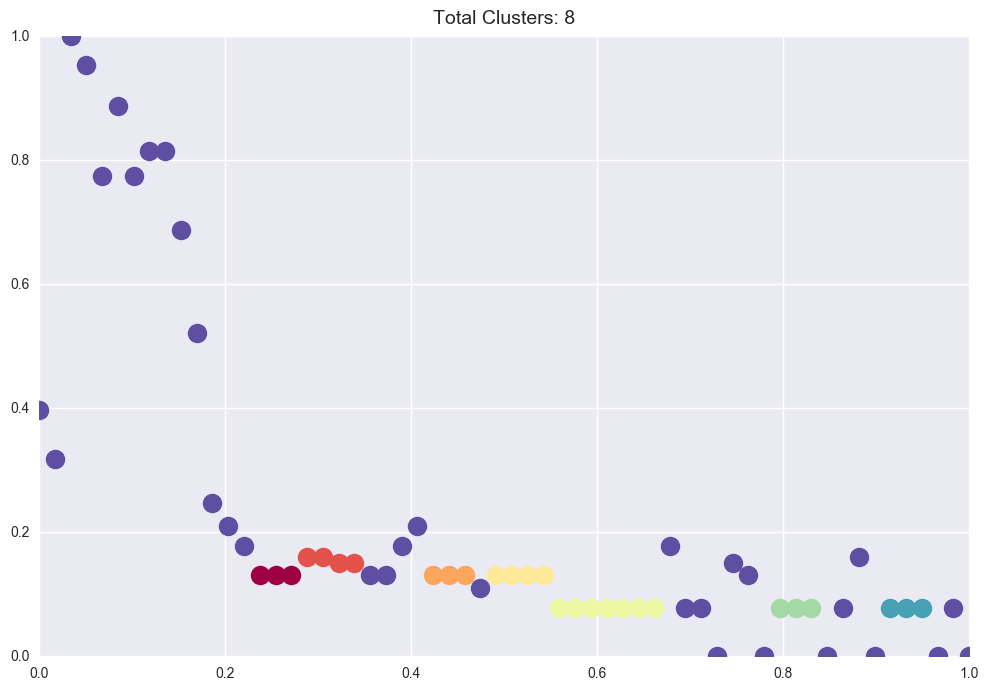

In [63]:
X = MinMaxScaler().fit_transform(ff) 
db = DBSCAN(eps = 0.02, min_samples = 3).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.subplots(figsize = (12,8))

for k,c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = c, markeredgecolor = 'k',markersize = 14)
    
    
plt.title('Total Clusters: {}'.format(clusters), fontsize = 14, y = 1.01) 

def calculate_cluster_means(X, labels):
    lbls = np.unique(labels)
    print "Cluster labels: {}".format(np.unique(lbls))

    cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
    print "Cluster Means: {}".format(cluster_means)
    return cluster_means

# Getting outliers and their indexes in dataframe
out_ind = []
for ind,y in enumerate(X):
    if labels[ind]== -1:
        out_ind.append([ind,y])
# out_ind

# Cluster means
cluster_means = calculate_cluster_means(X, labels)

# Outliers
class_member_mask = (labels == -1) 
outs = X[class_member_mask] 
# outs


# Finding closest cluster for each outlier
chosen_list = []

for out_index,out in enumerate(outs):    
    min_list = []
    for index,cm in enumerate(cluster_means):         
        min_list.append(euclidean(cm, out))

    for inx,abc in enumerate(min_list):
        if abc == sorted(min_list)[0]:
            chosen_list.append([out_index,inx])

outlier_prices = []
for i,abc in enumerate(out_ind):
    outlier_prices.append(df['Price'][abc[0]])
# for chosen in chosen_list:
#     outlier_cods = 

print chosen_list
# outlier_prices

# # for b in chosen_list:
# #     cluster_ind = []
# #     for ind,y in enumerate(X):
# #         if labels[ind]== b[1]:
# #             cluster_ind.append([ind,y])
            
# # print cluster_ind

# cluster_ind = []
# for b in chosen_list:
#     for ind,y in enumerate(X):
#         if labels[ind]== b[1]:
#             cluster_ind.append([ind,y])
            
            
# # print cluster_ind

# cluster_nearest_prices=[]
# for i,abc in enumerate(cluster_ind):
#     cluster_nearest_prices.append(df['Price'][abc[0]])
    
# print cluster_nearest_prices


mean_of_chosenlist_clusters= []
for b in chosen_list:
    mean_of_chosenlist_clusters.append(mean(cluster_mean_price(b[1])))

# for i in outlier_prices:
#     print i

# print mean_of_chosenlist_clusters

# print zip(outlier_prices, mean_of_chosenlist_clusters)
from statistics import stdev

stdev_of_chosenlist=[]
for b in chosen_list:
    stdev_of_chosenlist.append(stdev(cluster_mean_price(b[1])))
    
# stdev_of_chosenlist

outlier_indexes = []
for b in chosen_list:
    outlier_indexes.append(b[0])
    
# outlier_indexes

# df_best_price =pd.DataFrame(columns=('Start_Date','Price'))
# best_price_count = 0

# for x in range(0, (len(outlier_indexes))-1):    
#     m = int(mean_of_chosenlist_clusters[x])
#     s = int(stdev_of_chosenlist[x])
#     if (outlier_prices[x] <  (m - (2 * s))) and  (outlier_prices[x] < (m - 50)):
#         best_price_count += 1
#         df_best_price.loc[best_price_count] = df.ix[outlier_indexes[x]]

print outlier_indexes

In [ ]:
lbls = np.unique(labels)
range(0,(len(lbls)-1))

In [ ]:
def cluster_mean_price(index):
    clus_ind = []
    for ind,y in enumerate(X):
        if labels[ind]== index:
            clus_ind.append([ind,y])
    
    class_member_mask_clus = (labels == index) 
    clus = X[class_member_mask_clus] 
    
    clus_prices=[]
    for i,abc in enumerate(clus_ind):
        clus_prices.append(df['Price'][abc[0]])   

    return clus_prices
#     return statistics.stdev(clus_prices), statistics.mean(clus_prices)    

In [ ]:
def cluster_stdev_price(index):
    clus_ind = []
    for ind,y in enumerate(X):
        if labels[ind]== index:
            clus_ind.append([ind,y])
    
    class_member_mask_clus = (labels == index) 
    clus = X[class_member_mask_clus] 
    
    clus_prices=[]
    for i,abc in enumerate(clus_ind):
        clus_prices.append(df['Price'][abc[0]])   

    return statistics.stdev(clus_prices)   

In [ ]:
#Cluster one 
def calculate_cluster_means(X, labels):
    lbls = np.unique(labels)
    print "Cluster labels: {}".format(np.unique(lbls))

    cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
    print "Cluster Means: {}".format(cluster_means)
    return cluster_means

# Cluster means
cluster_means = calculate_cluster_means(X, labels)

# Getting cluster 1 and their indexes in dataframe
c1_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 0:
        c1_ind.append([ind,y])
# c1_ind

# Cluster 1
class_member_mask_c1 = (labels == 0) 
c1 = X[class_member_mask_c1] 


print c1_ind

cluster_one_prices=[]

for i,abc in enumerate(c1_ind):
    cluster_one_prices.append(df['Price'][abc[0]])
    
print cluster_one_prices
# cluster_one_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_one_prices_mean

# def mean(data):
#     """Return the sample arithmetic mean of data."""
#     n = len(data)
#     if n < 1:
#         raise ValueError('mean requires at least one data point')
#     return sum(data)/n # in Python 2 use sum(data)/float(n)



print statistics.stdev(cluster_one_prices)
print statistics.mean(cluster_one_prices)

In [ ]:
# Getting cluster 2 and their indexes in dataframe
c2_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 1:
        c2_ind.append([ind,y])
# c2_ind

# Cluster 2
class_member_mask_c2 = (labels == 1) 
c2 = X[class_member_mask_c2] 


print c2_ind

cluster_two_prices=[]

for i,abc in enumerate(c2_ind):
    cluster_two_prices.append(df['Price'][abc[0]])
    
print cluster_two_prices
# cluster_two_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_two_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5

# print mean(cluster_two_prices)
# print _ss(cluster_two_prices)
# pstdev(cluster_two_prices)

# for i in cluster_two_prices:
#     if i-i <=20:
#         print i

def cluster_mean_price(index):
    clus_ind = []
    for ind,y in enumerate(X):
        if labels[ind]== index:
            clus_ind.append([ind,y])
    
    class_member_mask_clus = (labels == index) 
    clus = X[class_member_mask_clus] 
    
    clus_prices=[]
    for i,abc in enumerate(clus_ind):
        clus_prices.append(df['Price'][abc[0]])   

    return clus_prices
#     return statistics.stdev(clus_prices), statistics.mean(clus_prices)    
prices = []
for i in range(0,4):
    prices.append(cluster_mean_price(i))
    
prices

for i in prices:
    for a in range(len(i)):
        if a -a <= 20:
            print i


In [ ]:
# Getting cluster 3 and their indexes in dataframe
c3_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 2:
        c3_ind.append([ind,y])
# c3_ind

# Cluster 3
class_member_mask_c3 = (labels == 2) 
c3 = X[class_member_mask_c3] 


print c3_ind

cluster_three_prices=[]

for i,abc in enumerate(c3_ind):
    cluster_three_prices.append(df['Price'][abc[0]])
    
print cluster_three_prices
# cluster_two_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_two_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5

print mean(cluster_three_prices)
print _ss(cluster_three_prices)
pstdev(cluster_three_prices)

In [ ]:
# Getting cluster 4 and their indexes in dataframe
c4_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 3:
        c4_ind.append([ind,y])
# c3_ind

# Cluster 3
class_member_mask_c4 = (labels == 4) 
c4 = X[class_member_mask_c4] 


print c4_ind

cluster_four_prices=[]

for i,abc in enumerate(c4_ind):
    cluster_four_prices.append(df['Price'][abc[0]])
    
print cluster_four_prices
# cluster_two_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_two_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5

print mean(cluster_four_prices)
print _ss(cluster_four_prices)
pstdev(cluster_four_prices)

In [ ]:
# Getting cluster 5 and their indexes in dataframe
c5_ind = []
for ind,y in enumerate(X):
    if labels[ind]== 4:
        c5_ind.append([ind,y])
# c5_ind

# Cluster 5
class_member_mask_c5 = (labels == 4) 
c5 = X[class_member_mask_c5] 


print c5_ind

cluster_five_prices=[]

for i,abc in enumerate(c5_ind):
    cluster_five_prices.append(df['Price'][abc[0]])
    
print cluster_five_prices
# cluster_two_prices_mean =  reduce(lambda x, y: x + y, cluster_one_prices) / len(cluster_one_prices)
# print cluster_two_prices_mean

def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def pstdev(data):
    """Calculates the population standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/n # the population variance
    return pvar**0.5

print mean(cluster_five_prices)
print _ss(cluster_five_prices)
pstdev(cluster_five_prices)

In [ ]:
cluster_mean_price(1)

In [ ]:
cluster_means = calculate_cluster_means(X, labels)
cluster_means
type(cluster_means)

In [ ]:
out_ind = []
for ind,y in enumerate(X):
    if labels[ind]== -1:
        out_ind.append([ind,y])
out_ind

# labels[0] == -1

In [ ]:
l[0]

In [ ]:
from scipy.spatial.distance import euclidean, chebyshev, cityblock

# get the distances to each clusters
labels = db.labels_
lbls = np.unique(db.labels_)
print "Cluster labels: {}".format(np.unique(lbls))

cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
print "Cluster Means: {}".format(cluster_means)

noise_point = X[30, :]

# euclidean
dist = [euclidean(noise_point, cm) for cm in cluster_means]
print "Euclidean distance: {}".format(dist)

# chebyshev
# dist = [chebyshev(noise_point, cm) for cm in cluster_means]
# print "Chebysev distance: {}".format(dist)

# cityblock
# dist = [cityblock(noise_point, cm) for cm in cluster_means]
# print "Cityblock (Manhattan) distance: {}".format(dist)

In [ ]:
db = DBSCAN(eps=0.1, min_samples=5).fit(X)

# shamelessly copied code below ;)
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
 
plt.subplots(figsize=(12,8))
 
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == -1)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
            markeredgecolor='k', markersize=14)
 
plt.title("Total Clusters: {}".format(clusters), fontsize=14,
        y=1.01)

In [ ]:
labels

In [ ]:
class_member_mask = (labels == -1)
xy = X[class_member_mask]
xy

In [ ]:
cluster_means

In [ ]:
# list=[]
dist1 = [(euclidean(cm, i)) for cm in cluster_means for i in xy ]
print "Euclidean distance: {}".format(dist1)

In [ ]:
dist1

In [ ]:
list[0]

In [ ]:
# dist2 = [euclidean(xy[1], cm) for cm in cluster_means]
# print "Euclidean distance: {}".format(dist)

In [ ]:
# dist2 = [euclidean(xy[2], cm) for cm in cluster_means]
# print "Euclidean distance: {}".format(dist)

In [ ]:
# dist3 = [euclidean(xy[3], cm) for cm in cluster_means]
# print "Euclidean distance: {}".format(dist)

In [ ]:
# dist4 = [euclidean(xy[4], cm) for cm in cluster_means]
# print "Euclidean distance: {}".format(dist)

In [ ]:
# db = DBSCAN(eps=0.2, min_samples=5).fit(X)

# # shamelessly copied code below ;)
# labels = db.labels_
# clusters = len(set(labels))
# unique_labels = set(labels)
# colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
 
# plt.subplots(figsize=(12,8))
 
# for k, c in zip(unique_labels, colors):
#     class_member_mask = (labels == k)
#     xy = X[class_member_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
#             markeredgecolor='k', markersize=14)
 
# plt.title("Total Clusters: {}".format(clusters), fontsize=14,
#         y=1.01)

In [ ]:
cluster_means

In [ ]:
class_member_mask

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

In [ ]:
print cluster_means


In [ ]:
# let's create some helper functions
def calculate_cluster_means(X, labels):
    lbls = np.unique(labels)
    print "Cluster labels: {}".format(np.unique(lbls))

    cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
    print "Cluster Means: {}".format(cluster_means)
    return cluster_means
    
def print_3_distances(noise_point, cluster_means):
    # euclidean
    dist = [euclidean(noise_point, cm) for cm in cluster_means]
    print "Euclidean distance: {}".format(dist)

#     # chebyshev
#     dist = [chebyshev(noise_point, cm) for cm in cluster_means]
#     print "Chebysev distance: {}".format(dist)

#     # cityblock
#     dist = [cityblock(noise_point, cm) for cm in cluster_means]
#     print "Cityblock (Manhattan) distance: {}".format(dist)
    
def plot_the_clusters(X, dbscan_model, noise_point=None):
    labels = dbscan_model.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
                markeredgecolor='k', markersize=14)
        
    if noise_point is not None:
        plt.plot(noise_point[0], noise_point[1], 'xr')

    plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)
    
def do_yo_thang(X, dbscan_model, noise_point):
    cluster_means = calculate_cluster_means(X, dbscan_model.labels_)
    print_3_distances(noise_point, cluster_means)
    plot_the_clusters(X, dbscan_model, noise_point)

In [ ]:
calculate_cluster_means(X, labels)

In [ ]:
print_3_distances(noise_point, cluster_means)

In [ ]:
plot_the_clusters(X, db_ss, noise_point=None)

In [ ]:
X_ss = StandardScaler().fit_transform(X)
db_ss = DBSCAN(eps=0.4, min_samples=3).fit(X_ss)
noise_point = X_ss[30, :]
do_yo_thang(X_ss, db_ss, noise_point)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler
from sklearn.cluster import DBSCAN

%matplotlib inline

In [ ]:
def makeX(prices):
    return np.concatenate(df[Prices], axis=1)

prices_ss = StandardScaler().fit_transform(noise_point[:, None])
prices_rob = RobustScaler().fit_transform(noise_point[:, None])

days_mm4 = X_scaled
# MinMaxScaler(feature_range=(-4,4)).fit_transform(days[:, None])

X_ssmm4 = makeX(prices_rob)
db = DBSCAN(eps=0.6, min_samples=5).fit(X_ssmm4)
# show with X_ss again

noise_point = X_ssmm4[30, :]
do_yo_thang(X_ssmm4, db, noise_point)
for index, xy in enumerate(zip(days_mm4, prices_ss)):
    plt.annotate('{}: ({:0.2f}, {:0.2f})'.format(index, xy[0][0], xy[1][0]), xytext=(xy[0]-0.45, xy[1]-0.15), xy=xy)

In [ ]:
D = distance.squareform(distance.pdist(X))
S = np.max(D) - D
db = DBSCAN(eps=0.5 * np.max(D), min_samples=10).fit(S)

In [ ]:
# db = DBSCAN(eps=0.2, min_samples=5).fit(X)
# core_samples = db.core_sample_indices_
# labels = db.labels_
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print n_clusters_


In [ ]:
clusters = [X[labels == i] for i in xrange(n_clusters_)]

In [ ]:
clusters

In [ ]:
outliers = X[labels == -1]

In [ ]:
outliers